Can you fit an exponential function to the number of confirmed, recovered and deaths data for a country, India,
, and plot the data points along with the fitted functions. Note that you have to fit fit three different functions for three time series. Along that it would also be great if you can write s phtno। program to compute doubling rate for India.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
# from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

covid = pd.read_csv('covid.csv', index_col=0)
covid.head()

,date,country,confirmed,deaths,recovered
0,02-26-2020,Mainland China,78065.0,2715.0,30053.0
1,02-26-2020,South Korea,1261.0,12.0,22.0
2,02-26-2020,Others,705.0,4.0,10.0
3,02-26-2020,Italy,453.0,12.0,3.0
4,02-26-2020,Japan,189.0,2.0,22.0


In [2]:
covidIndia = covid[covid['country']=='India']
covidIndia.drop('country', axis=1, inplace=True)
covidIndia.set_index('date', inplace=True)
covidIndia.index = pd.to_datetime(covidIndia.index)
covidIndia.sort_index(inplace=True)
covidIndia['deltaT'] = covidIndia.index.to_series().diff().astype('timedelta64[D]')
covidIndia.fillna(0, inplace=True)
covidIndia['T'] = covidIndia['deltaT'].cumsum()
covidIndia.head()

,confirmed,deaths,recovered,deltaT,T
date,,,,,
2020-01-30,1.0,0.0,0.0,0.0,0.0
2020-01-31,1.0,0.0,0.0,1.0,1.0
2020-02-01,1.0,0.0,0.0,1.0,2.0
2020-02-02,2.0,0.0,0.0,1.0,3.0
2020-02-03,3.0,0.0,0.0,1.0,4.0


Text(0, 0.5, 'Log cases')

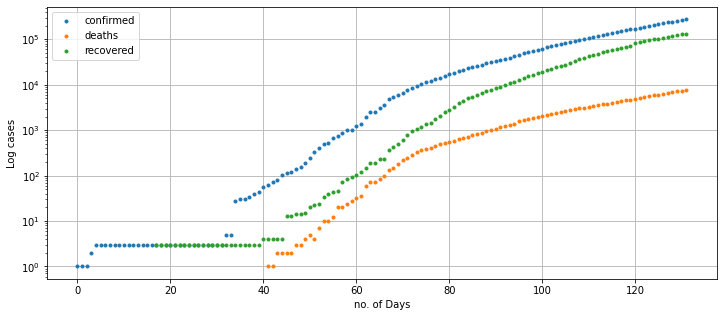

In [3]:
# semilog plot
plt.figure(figsize=(12,5))
plt.semilogy(covidIndia['T'].values, covidIndia['confirmed'], '.', label = 'confirmed')
plt.semilogy(covidIndia['T'].values, covidIndia['deaths'], '.', label='deaths')
plt.semilogy(covidIndia['T'].values, covidIndia['recovered'], '.', label='recovered')
plt.grid()
plt.legend()
plt.xlabel('no. of Days')
plt.ylabel('Log cases')

In [4]:
df = covidIndia.copy()
df['log confirmed'] = df['confirmed'].apply(lambda x:np.log(x))
df['log deaths'] = df['deaths'].apply(lambda x:np.log(x))
df['log recovered'] = df['recovered'].apply(lambda x:np.log(x))
df.head()

,confirmed,deaths,recovered,deltaT,T,log confirmed,log deaths,log recovered
date,,,,,,,,
2020-01-30,1.0,0.0,0.0,0.0,0.0,0.000000,-inf,-inf
2020-01-31,1.0,0.0,0.0,1.0,1.0,0.000000,-inf,-inf
2020-02-01,1.0,0.0,0.0,1.0,2.0,0.000000,-inf,-inf
2020-02-02,2.0,0.0,0.0,1.0,3.0,0.693147,-inf,-inf
2020-02-03,3.0,0.0,0.0,1.0,4.0,1.098612,-inf,-inf


Total loss: 1.1203440683947747


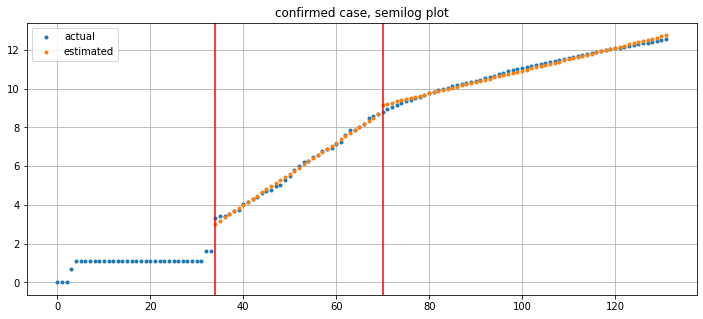

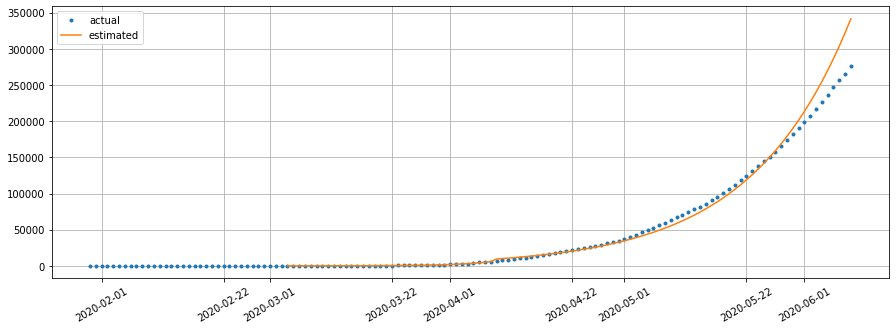

In [27]:
# y = Ae^(Bx)
x_lim1, x_lim2, case = 34, 70, 'confirmed'

df['estimated log '+ case] = [np.nan]*len(df)
df['estimated '+ case] = [np.nan]*len(df)

x = np.expand_dims(df.iloc[x_lim1:x_lim2]['T'].values, axis=1)
y = np.expand_dims(df.iloc[x_lim1:x_lim2]['log '+case].values, axis=1)
model = LinearRegression()
model.fit(x, y)
m, c = model.coef_[0,0], model.intercept_[0]
X = df['T'].iloc[x_lim1:x_lim2].values
Y = m*X+c
df['estimated log '+ case].iloc[x_lim1:x_lim2] = Y
df['estimated '+ case].iloc[x_lim1:x_lim2] = np.exp(Y)
ols_1 = np.sum((Y - df['log '+ case].iloc[x_lim1:x_lim2].values)**2)

x = np.expand_dims(df.iloc[x_lim2:]['T'].values, axis=1)
y = np.expand_dims(df.iloc[x_lim2:]['log '+case].values, axis=1)
model = LinearRegression()
model.fit(x, y)
m, c = model.coef_[0,0], model.intercept_[0]
X = df['T'].iloc[x_lim2:].values
Y = m*X+c
df['estimated log '+ case].iloc[x_lim2:] = Y
df['estimated '+ case].iloc[x_lim2:] = np.exp(Y)
ols_2 = np.sum((Y-df['log '+ case].iloc[x_lim2:])**2)

loss = np.sqrt(ols_1+ols_2)
print('Total loss: {}'.format(loss))

plt.figure(figsize=(12,5))
plt.plot(df['T'], np.log(df[case]), '.', label = 'actual')
plt.plot(df['T'], np.log(df['estimated ' + case]), '.', label= 'estimated')
plt.axvline(x=x_lim1, color='r')
plt.axvline(x=x_lim2, color='r')
plt.grid()
plt.legend()
plt.title(case +' case, semilog plot')

# df[['estimated '+case, case]].plot(grid=True, figsize=(12,5))
plt.figure(figsize=(15,5))
plt.plot(df.index, df[case].values, '.', label='actual')
plt.plot(df.index, df['estimated '+case].values, label='estimated')
plt.grid()
plt.legend()
plt.xticks(rotation=30);

Total loss: 1.2233442454443633


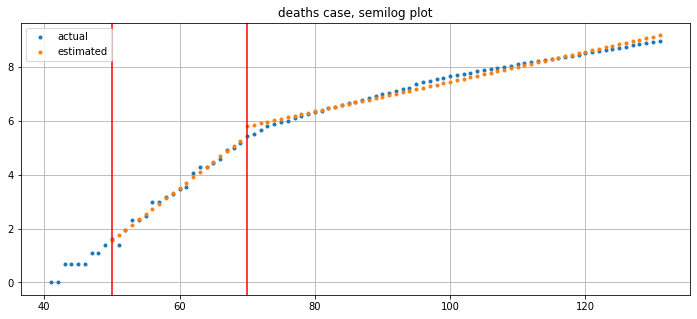

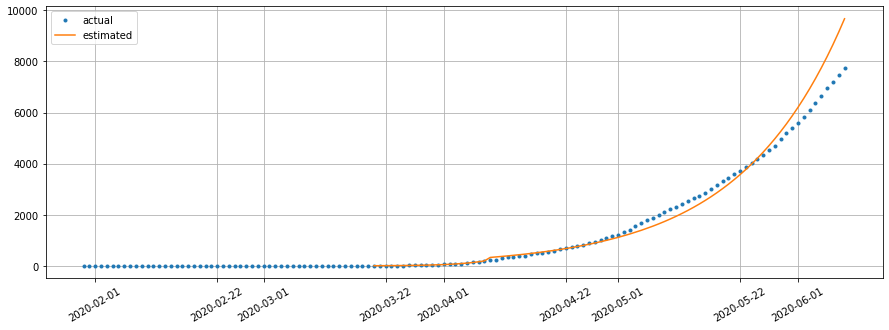

In [28]:
# y = Ae^(Bx)
x_lim1, x_lim2, case = 50, 70, 'deaths'

df['estimated log '+ case] = [np.nan]*len(df)
df['estimated '+ case] = [np.nan]*len(df)

x = np.expand_dims(df.iloc[x_lim1:x_lim2]['T'].values, axis=1)
y = np.expand_dims(df.iloc[x_lim1:x_lim2]['log '+case].values, axis=1)
model = LinearRegression()
model.fit(x, y)
m, c = model.coef_[0,0], model.intercept_[0]
X = df['T'].iloc[x_lim1:x_lim2].values
Y = m*X+c
df['estimated log '+ case].iloc[x_lim1:x_lim2] = Y
df['estimated '+ case].iloc[x_lim1:x_lim2] = np.exp(Y)
ols_1 = np.sum((Y - df['log '+ case].iloc[x_lim1:x_lim2].values)**2)

x = np.expand_dims(df.iloc[x_lim2:]['T'].values, axis=1)
y = np.expand_dims(df.iloc[x_lim2:]['log '+case].values, axis=1)
model = LinearRegression()
model.fit(x, y)
m, c = model.coef_[0,0], model.intercept_[0]
X = df['T'].iloc[x_lim2:].values
Y = m*X+c
df['estimated log '+ case].iloc[x_lim2:] = Y
df['estimated '+ case].iloc[x_lim2:] = np.exp(Y)
ols_2 = np.sum((Y-df['log '+ case].iloc[x_lim2:])**2)

loss = np.sqrt(ols_1+ols_2)
print('Total loss: {}'.format(loss))

plt.figure(figsize=(12,5))
plt.plot(df['T'], np.log(df[case]), '.', label = 'actual')
plt.plot(df['T'], np.log(df['estimated ' + case]), '.', label= 'estimated')
plt.axvline(x=x_lim1, color='r')
plt.axvline(x=x_lim2, color='r')
plt.grid()
plt.legend()
plt.title(case +' case, semilog plot')

# df[['estimated '+case, case]].plot(grid=True, figsize=(12,5))
plt.figure(figsize=(15,5))
plt.plot(df.index, df[case].values, '.', label='actual')
plt.plot(df.index, df['estimated '+case].values, label='estimated')
plt.grid()
plt.legend()
plt.xticks(rotation=30);

Total loss: 1.0023820470691749


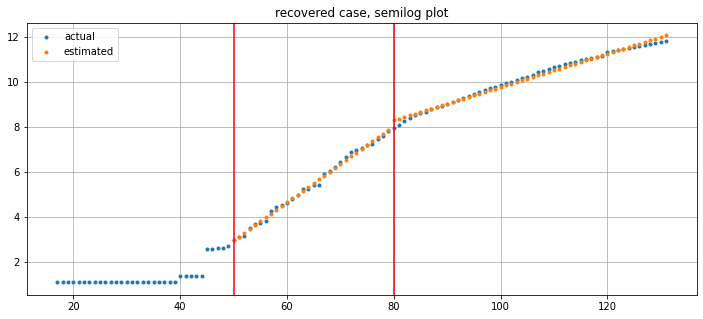

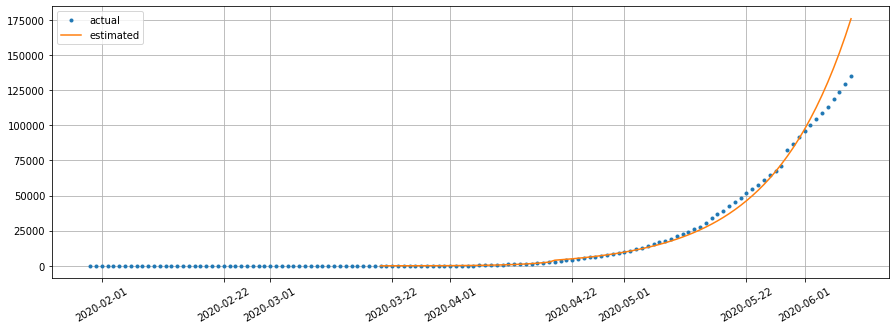

In [29]:
# y = Ae^(Bx)
x_lim1, x_lim2, case = 50, 80, 'recovered'

df['estimated log '+ case] = [np.nan]*len(df)
df['estimated '+ case] = [np.nan]*len(df)

x = np.expand_dims(df.iloc[x_lim1:x_lim2]['T'].values, axis=1)
y = np.expand_dims(df.iloc[x_lim1:x_lim2]['log '+case].values, axis=1)
model = LinearRegression()
model.fit(x, y)
m, c = model.coef_[0,0], model.intercept_[0]
X = df['T'].iloc[x_lim1:x_lim2].values
Y = m*X+c
df['estimated log '+ case].iloc[x_lim1:x_lim2] = Y
df['estimated '+ case].iloc[x_lim1:x_lim2] = np.exp(Y)
ols_1 = np.sum((Y - df['log '+ case].iloc[x_lim1:x_lim2].values)**2)

x = np.expand_dims(df.iloc[x_lim2:]['T'].values, axis=1)
y = np.expand_dims(df.iloc[x_lim2:]['log '+case].values, axis=1)
model = LinearRegression()
model.fit(x, y)
m, c = model.coef_[0,0], model.intercept_[0]
X = df['T'].iloc[x_lim2:].values
Y = m*X+c
df['estimated log '+ case].iloc[x_lim2:] = Y
df['estimated '+ case].iloc[x_lim2:] = np.exp(Y)
ols_2 = np.sum((Y-df['log '+ case].iloc[x_lim2:])**2)

loss = np.sqrt(ols_1+ols_2)
print('Total loss: {}'.format(loss))

plt.figure(figsize=(12,5))
plt.plot(df['T'], np.log(df[case]), '.', label = 'actual')
plt.plot(df['T'], np.log(df['estimated ' + case]), '.', label= 'estimated')
plt.axvline(x=x_lim1, color='r')
plt.axvline(x=x_lim2, color='r')
plt.grid()
plt.legend()
plt.title(case +' case, semilog plot')

# df[['estimated '+case, case]].plot(grid=True, figsize=(12,5))
plt.figure(figsize=(15,5))
plt.plot(df.index, df[case].values, '.', label='actual')
plt.plot(df.index, df['estimated '+case].values, label='estimated')
plt.grid()
plt.legend()
plt.xticks(rotation=30);

In [30]:
df

,confirmed,deaths,recovered,deltaT,T,log confirmed,log deaths,log recovered,estimated log confirmed,estimated confirmed,estimated log deaths,estimated deaths,estimated log recovered,estimated recovered
date,,,,,,,,,,,,,,
2020-01-30,1.0,0.0,0.0,0.0,0.0,0.000000,-inf,-inf,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-31,1.0,0.0,0.0,1.0,1.0,0.000000,-inf,-inf,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-01,1.0,0.0,0.0,1.0,2.0,0.000000,-inf,-inf,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-02,2.0,0.0,0.0,1.0,3.0,0.693147,-inf,-inf,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-03,3.0,0.0,0.0,1.0,4.0,1.098612,-inf,-inf,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-05,236184.0,6649.0,113233.0,1.0,127.0,12.372366,8.802222,11.637203,12.506646,270126.631697,8.955380,7749.471143,11.780006,130614.527991
2020-06-06,246622.0,6946.0,118695.0,1.0,128.0,12.415612,8.845921,11.684312,12.565354,286460.003766,9.010797,8191.045185,11.854105,140660.587584
2020-06-07,257486.0,7207.0,123848.0,1.0,129.0,12.458721,8.882808,11.726810,12.624062,303780.983172,9.066214,8657.780640,11.928204,151479.327787
